# Part 1 

In [1]:
## 1. Import the necessary libraries (Importieren Sie die notwendigen Bibliotheken )
from mymodule import check_df, find_categorical_columns, binary_columns_find, find_outlier_columns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline
import pandas as pd
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt

In [2]:
### Disable the Python warnings
### Deaktivieren Sie die Python-Warnungen
import warnings
warnings.filterwarnings('ignore')

In [3]:
### 2.Print first 5 row of the dataset (Geben Sie die ersten 10 Zeilen des Datensatzes aus.)
df=pd.read_csv('wine-clustering.csv')
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
## use check_df funtion to analyse the dataframe  

In [5]:
check_df(df)

##################### Shape #####################
(178, 13)
##################### Duplicate Values #####################
0
##################### NA #####################
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64
##################### Types #####################
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
### Check for outliers using a box plot.
### Überprüfe auf Ausreißer mit einem Boxplot.

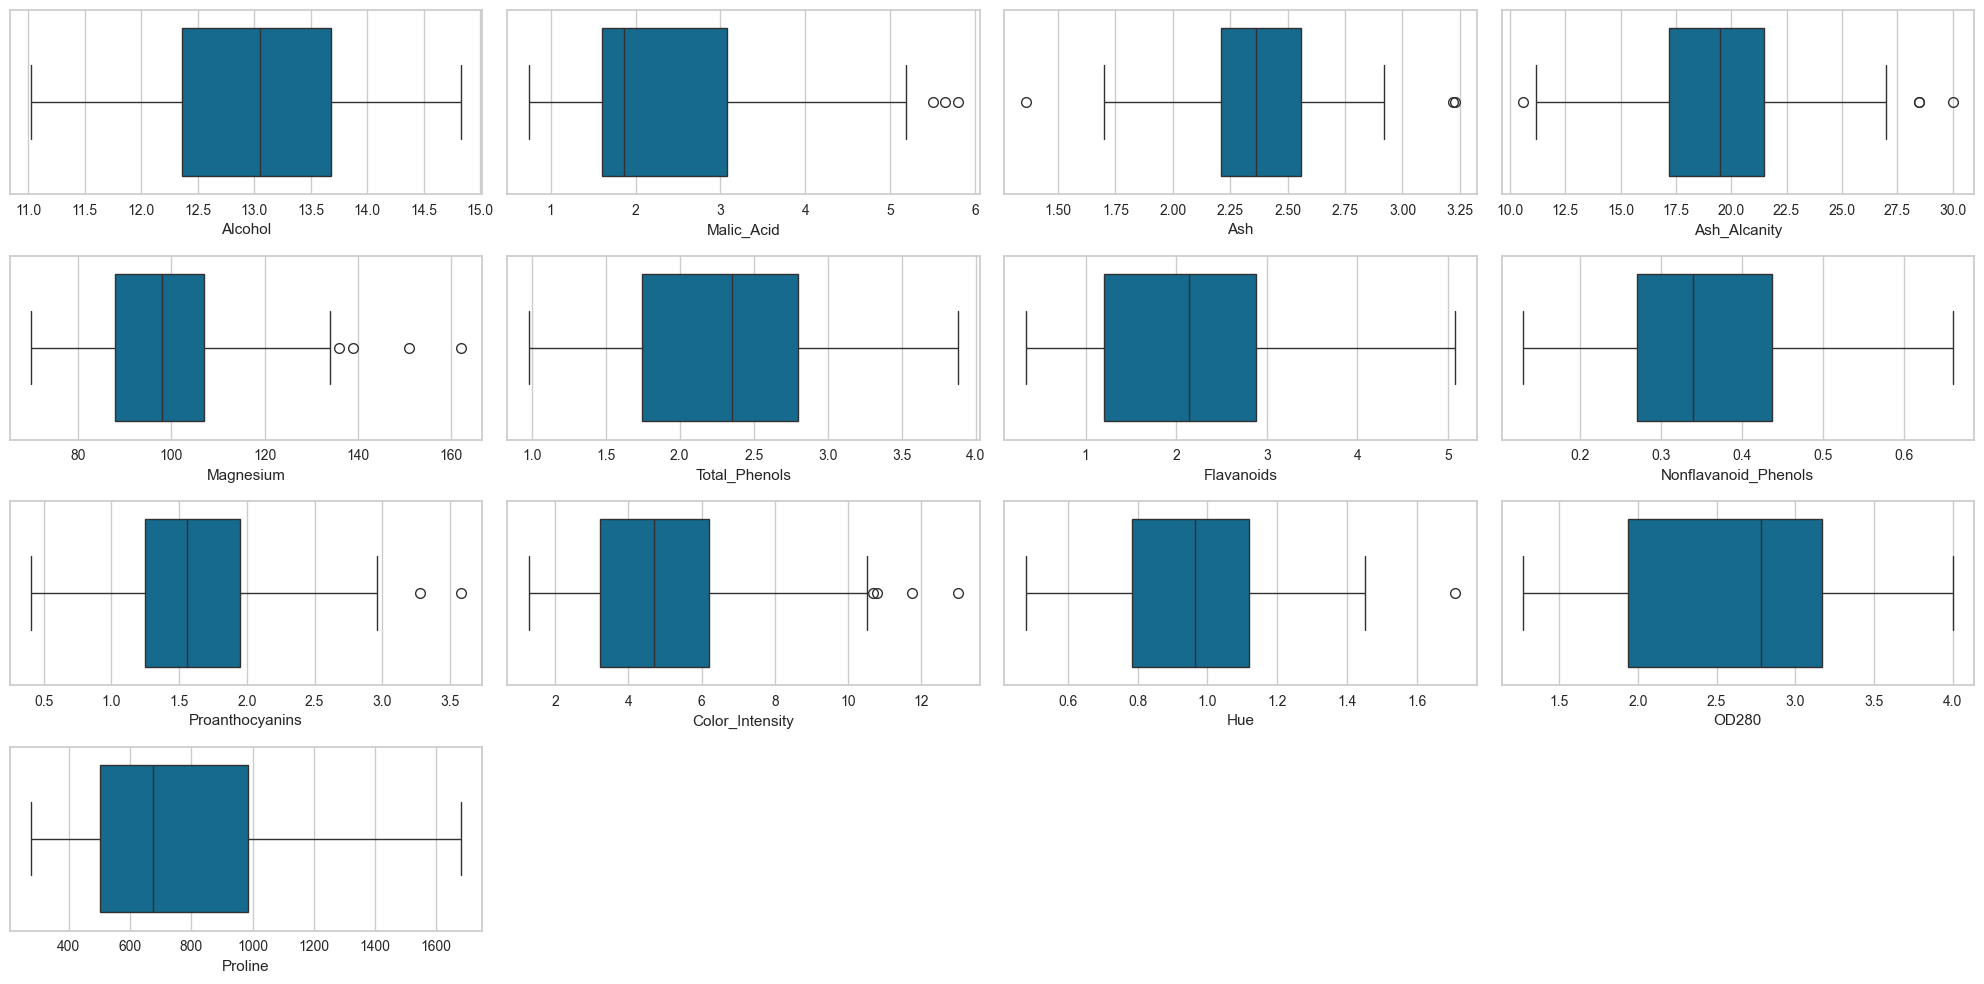

In [7]:
plt.figure(figsize=(20, 10)) 
for index, column in enumerate(df):
    plt.subplot(4, 4, index + 1)  
    sns.boxplot(x=column, data=df)
plt.tight_layout() 
plt.show()

In [8]:
### Check whether there are outliers with 0.01 and 0.99 parameters; if there are, replace them with the lower_limit and max_limit
### Überprüfe, ob es Ausreißer mit den Parametern 0,01 und 0,99 gibt; falls ja, ersetze sie durch das untere Limit und das obere Limit

In [9]:
find_outlier_columns(df, 0.01, 0.99)

[]

In [10]:
### Use the StandardScaler to scale the dataset
### Verwende den StandardScaler, um das Dataset zu skalieren

In [11]:
sc=StandardScaler()
df=sc.fit_transform(df)

## K means model 

In [12]:
## Activate the code below to analyze the number of clusters.
## Aktiviere den untenstehenden Code, um die Anzahl der Cluster zu analysieren

  File "C:\Users\habdullayev\Documents\Machine_learning_course\ml_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


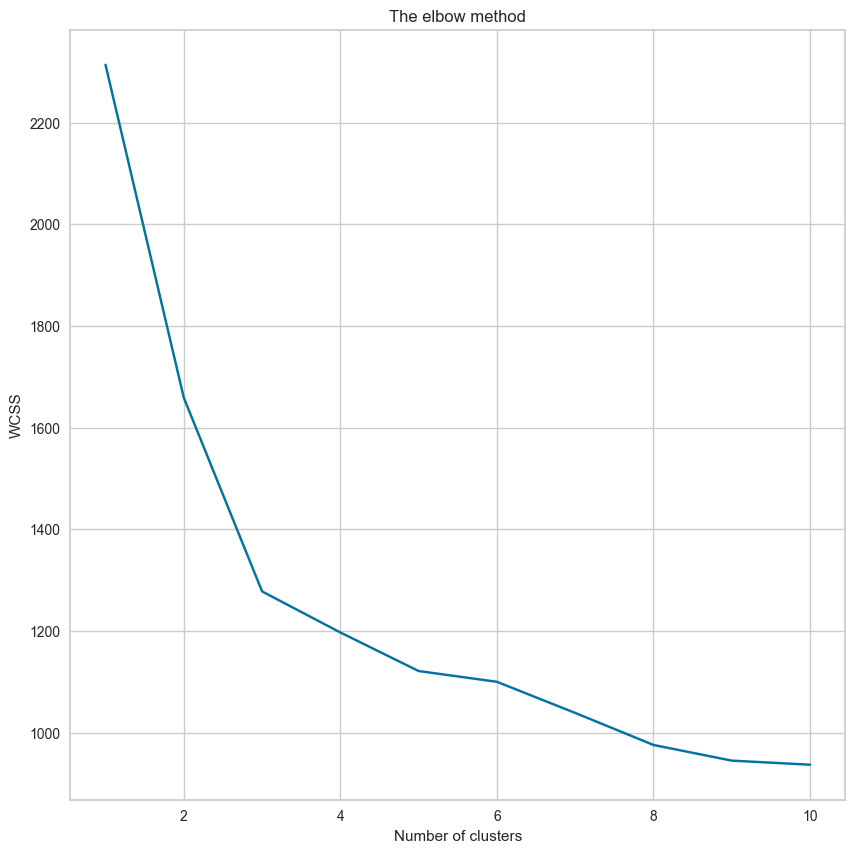

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10000, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


In [14]:
## Use KElbowVisualizer to find the optimum number of clusters
## Verwende KElbowVisualizer, um die optimale Anzahl von Clustern zu finden

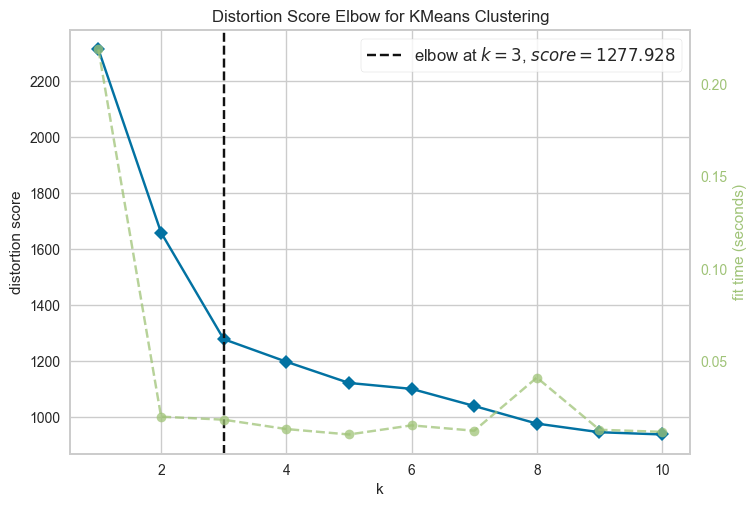

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
kmeans = KMeans(max_iter = 10000, random_state = 0)
elbow = KElbowVisualizer(kmeans, k=(1, 11) )
elbow.fit(df)
elbow.show()

In [16]:
elbow.elbow_value_

3

In [17]:
## Train the model at the optimum number of clusters by activating the code below
## Trainiere das Modell bei der optimalen Anzahl von Clustern, indem du den untenstehenden Code aktivierst

kmeans = KMeans(n_clusters = elbow.elbow_value_, max_iter = 1000, random_state = 0)
kmeans.fit(df)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [18]:
## Call the dataframe again and add the cluster column to df
## Rufe das DataFrame erneut auf und füge die Cluster-Spalte zu df hinzu

In [19]:
df=pd.read_csv('wine-clustering.csv')
df['clusters']=kmeans.labels_
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [20]:
## Activate the code below and analyze the result.
### Aktiviere den untenstehenden Code und analysiere das Ergebnis
df.groupby("clusters").agg(["count","mean","median"])

Alcohol                    Malic_Acid                    Ash  \
           count       mean  median      count      mean median count   
clusters                                                                
0             65  12.250923  12.250         65  1.897385  1.610    65   
1             51  13.134118  13.110         51  3.307255  3.270    51   
2             62  13.676774  13.735         62  1.997903  1.765    62   

                          Ash_Alcanity  ... Color_Intensity   Hue            \
              mean median        count  ...          median count      mean   
clusters                                ...                                   
0         2.231231  2.240           65  ...             2.9    65  1.062708   
1         2.417647  2.380           51  ...             7.3    51  0.691961   
2         2.466290  2.445           62  ...             5.4    62  1.065484   

                OD280                  Proline                       
         median count      mean median   count         mean  median  
clusters                                                             
0          1.04    65  2.803385   2.84      65   510.169231   495.0  
1          0.67    51  1.696667   1.68      51   619.058824   620.0  
2          1.07    62  3.163387   3.17      62  1100.225806  1072.5  

[3 rows x 39 columns]

In [ ]:
## Cluster the cluster difference, what should the cluster names be?
## Gruppiere den Unterschied zwischen den Clustern, wie sollten die Clusternamen sein?